<a href="https://colab.research.google.com/github/LuisaBeccar/Clases-de-CoderHouse-Data-Science/blob/main/Visualizaciones_LuisaBeccarVarela_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP FINAL - CIENCIA DE DATOS 61140 - CODERCHOUSE 2024**

LUISA BECCAR VARELA

**BASE DE DATOS**: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

**OBJETIVO**: predecir si una mujer estará viva a 60 meses del diagnosico de cancer de mama, segun las caracteristicas del mismo.

**Visualizaciones a partir del df original**

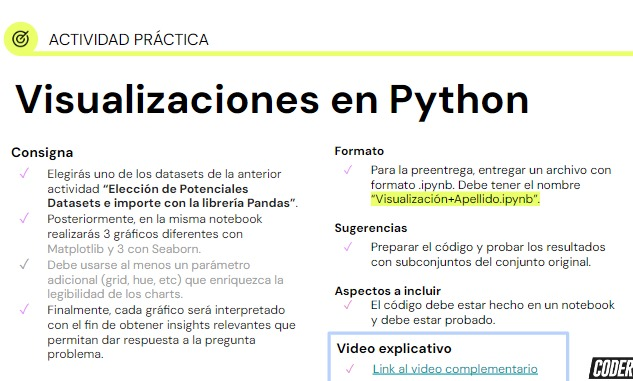

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import dates as mpl_dates
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
url = 'https://raw.githubusercontent.com/LuisaBeccar/Clases-de-CoderHouse-Data-Science/main/Breast_Cancer.csv'
df = pd.read_csv(url)

In [ ]:
# Agrego columna Sobrevida si "survival months" > 3 meses
Sobrevida = []
for i in df["Survival Months"]: #para cada elemento de "survival months", evalua si es mayor a 60 meses (5 años) (TRUE) y el resultado booleano (TRUE O FALSE) agregalo a la lista "Sobrevida"
    Sobrevida.append(i >= 60)
Sobrevida = pd.Series(Sobrevida)
df["Sobrevida"] = Sobrevida

# modificar el nombre de Reginol Node Positive por Regional Node Positive
df.rename(columns={'Reginol Node Positive':'Regional Node Positive'}, inplace=True)

# modificar el nombre de "T Stage " por "T Stage" sin espacio final
df.rename(columns={'T Stage ':'T Stage'}, inplace=True)

# modificar el nombre de "differentiate" por "Differentiate" sin espacio final
df.rename(columns={'differentiate':'Differentiate'}, inplace=True)

In [ ]:
# probando codigos para investigar la base de datos

print(df.columns, "\n",

      df.dtypes, "\n",

      df.index, "\n",

      df.info(), "\n",

      df.describe(),
      df.describe(include=object))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Regional Node Positive  4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
# Para tener ordenado los atributos categoricos qué contienen

# Seleccionar solo las columnas de tipo objeto
obj_cols = df.select_dtypes(include='object')

for col in obj_cols.columns:
    unique_values = df[col].unique()
    num_categories = len(unique_values)
    print(col,": ", num_categories, ": ", unique_values)
    print('---')


Race :  3 :  ['White' 'Black' 'Other']
---
Marital Status :  5 :  ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
---
T Stage :  4 :  ['T1' 'T2' 'T3' 'T4']
---
N Stage :  3 :  ['N1' 'N2' 'N3']
---
6th Stage :  5 :  ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
---
Differentiate :  4 :  ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
---
Grade :  4 :  ['3' '2' '1' ' anaplastic; Grade IV']
---
A Stage :  2 :  ['Regional' 'Distant']
---
Estrogen Status :  2 :  ['Positive' 'Negative']
---
Progesterone Status :  2 :  ['Positive' 'Negative']
---
Status :  2 :  ['Alive' 'Dead']
---


In [ ]:
# Filtro por el que sobrevivio solo 1 mes (el minimo) y los que mayor tiempo registrado sobrevivieron (107meses)

SVmin = df["Survival Months"].min()
#SVmin #1 mes
minSV = df[df["Survival Months"] == SVmin]

# Filtro por los que van sobreviviendo lo maximo de tiempo registrado (107 meses) y describo

SVmax = df["Survival Months"].max()
#SVmax # 107 meses
maxSV = df[df["Survival Months"] == SVmax]


sobrevivientes = pd.DataFrame(maxSV)
print(sobrevivientes.describe(include=object), sobrevivientes.describe())


         Race Marital Status T Stage N Stage 6th Stage  \
count      61             61      61      61        61   
unique      3              4       4       3         5   
top     White        Married      T2      N1       IIB   
freq       56             39      31      43        21   

                    Differentiate Grade   A Stage Estrogen Status  \
count                          61    61        61              61   
unique                          3     3         2               2   
top     Moderately differentiated     2  Regional        Positive   
freq                           38    38        58              54   

       Progesterone Status Status  
count                   61     61  
unique                   2      1  
top               Positive  Alive  
freq                    45     61                Age  Tumor Size  Regional Node Examined  Regional Node Positive  \
count  61.000000   61.000000               61.000000               61.000000   
mean   53.524590   28.2

## 5 AÑOS (60 MESES) - FILTRO EN DOS DF <br>
mas60meses LOS QUE VIVIERON MAS DE 5 AÑOS POST DIAGNOSTICO <BR>
menos60meses LOS QUE NO VIVIERON MAS DE 5 AÑOS POST DIAGNOSTICO.

In [ ]:
# Filtro por los que sobrevivireron 5 años (60 meses) y los que no llegaron a los 5 meses.
# Disclaimer: puede haber registros que sobrevivieron mas de 5 años pero ya murieron
# Y obviamente tambien hay registros que van sobreviviendo menos de 5 años, porque su diagnostico se habra hecho hace menos de 5 años


mas60meses = df[df["Survival Months"] >= 60]
#meas60meses
print("VIVIERON MAS DE 5 AÑOS", mas60meses.describe(include=object).T, "\n", "\n", mas60meses.describe().T)

print( "\n", "------------------------------", "\n" )
menos60meses = df[df["Survival Months"] <60]
#menos60meses
print("VIVIERON MENOS DE 5 AÑOS", menos60meses.describe(include=object).T, "\n", "\n", menos60meses.describe().T)

VIVIERON MAS DE 5 AÑOS                     count unique                        top  freq
Race                 2821      3                      White  2401
Marital Status       2821      5                    Married  1865
T Stage              2821      4                         T2  1229
N Stage              2821      3                         N1  1989
6th Stage            2821      5                        IIA   980
Differentiate        2821      4  Moderately differentiated  1686
Grade                2821      4                          2  1686
A Stage              2821      2                   Regional  2773
Estrogen Status      2821      2                   Positive  2672
Progesterone Status  2821      2                   Positive  2384
Status               2821      2                      Alive  2654 
 
                          count       mean        std   min   25%   50%   75%  \
Age                     2821.0  53.921305   8.867994  30.0  47.0  54.0  61.0   
Tumor Size           

In [ ]:
# Mismo filtro pero usando la columna creada por mi "Sobrevida", que ya resume si vivio mas o menos de 60 meses, en un tipo booleano

mas60meses = df[df["Sobrevida"] == True]
#meas60meses
print("VIVIERON MAS DE 5 AÑOS", mas60meses.describe(include=object).T, "\n", "\n", mas60meses.describe().T)

print( "\n", "------------------------------", "\n" )
menos60meses = df[df["Sobrevida"] == False]
#menos60meses
print("VIVIERON MENOS DE 5 AÑOS", menos60meses.describe(include=object).T, "\n", "\n", menos60meses.describe().T)

VIVIERON MAS DE 5 AÑOS                     count unique                        top  freq
Race                 2821      3                      White  2401
Marital Status       2821      5                    Married  1865
T Stage              2821      4                         T2  1229
N Stage              2821      3                         N1  1989
6th Stage            2821      5                        IIA   980
Differentiate        2821      4  Moderately differentiated  1686
Grade                2821      4                          2  1686
A Stage              2821      2                   Regional  2773
Estrogen Status      2821      2                   Positive  2672
Progesterone Status  2821      2                   Positive  2384
Status               2821      2                      Alive  2654 
 
                          count       mean        std   min   25%   50%   75%  \
Age                     2821.0  53.921305   8.867994  30.0  47.0  54.0  61.0   
Tumor Size           

# MATPLOTLIB

Text(0, 0.5, 'Cantidad')

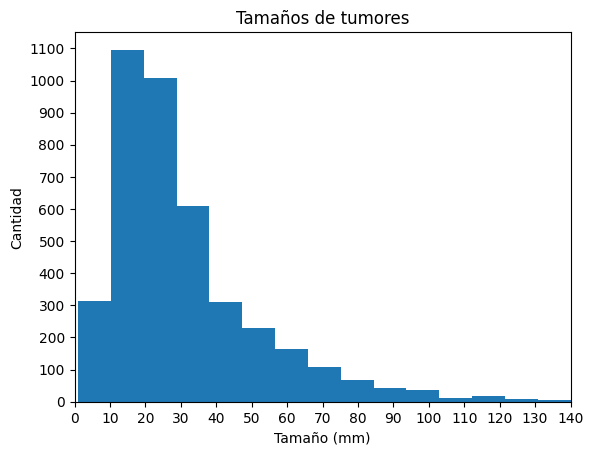

In [ ]:
# Histograma para ver frecuencia de los tamaños tumorales

# Totales
size = np.array(df['Tumor Size'])
fig, ax = plt.subplots()
ax.hist(size, bins=15) # default daba 10 bins
ax.set_title('Tamaños de tumores')
ax.set_xlim([0,140])
ax.set_xticks(range(0, 141, 10))
ax.set_xlabel('Tamaño (mm)')
ax.set_yticks(range(0, 1200, 100))
ax.set_ylabel('Cantidad')

# vemos que la mayoria son de entre 10 y 25 mm. La variable Tamaño de tumor tiene una distribucion asimetrica a la derecha


In [ ]:
df['Tumor Size'].std().round(1) # 21.1
df['Tumor Size'].mean().round(1) # 30.5
df['Tumor Size'].median().round(1) # 25
# el desvio estandar del Tamaño Tumoral de mi muestra es 21.1, la media es 30.5, mediana 25mm

coef_var = df["Tumor Size"].std() / df['Tumor Size'].mean() *100
coef_var # 69.3 me dice que es muy heterogenea en cuanto a tamaños tumorales mi muestra


69.30476168824006

EDADES

Text(0, 0.5, 'Cantidad')

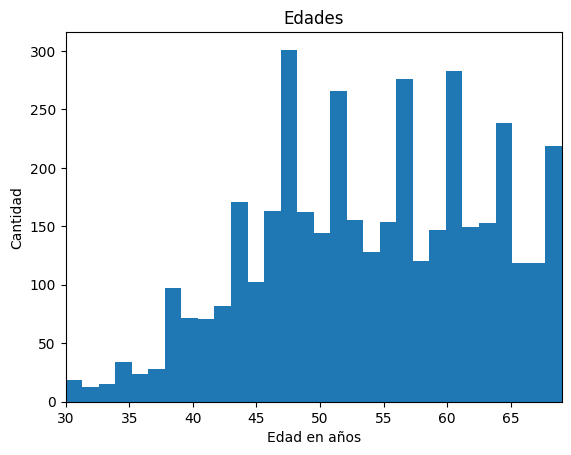

In [ ]:
# Histograma para ver frecuencia de Edades

size = np.array(df['Age'])
fig, ax = plt.subplots()
ax.hist(size, bins=30) # default daba 10 bins
ax.set_title('Edades')
ax.set_xlim([30,69])
ax.set_xticks(range(30, 69, 5))
ax.set_xlabel('Edad en años')
#ax.set_yticks(range(0, 1200, 100))
ax.set_ylabel('Cantidad')



In [ ]:
#Un valor de desviación estándar más alto indica una mayor dispersión de los datos. DV bajos son menor dispersion de los datos

df['Age'].std().round(1) # desvio estandar 9
df['Age'].mean().round(1) # media de edades 54
df['Age'].median().round(1) # mediana 54

coef_var = df["Age"].std() / df['Age'].mean() *100
coef_var # 16.6 es menor a 30% entonces seria una muestra bastante homogenea en cuanto a las edades



16.60695671201405

Text(0, 0.5, 'Cantidad')

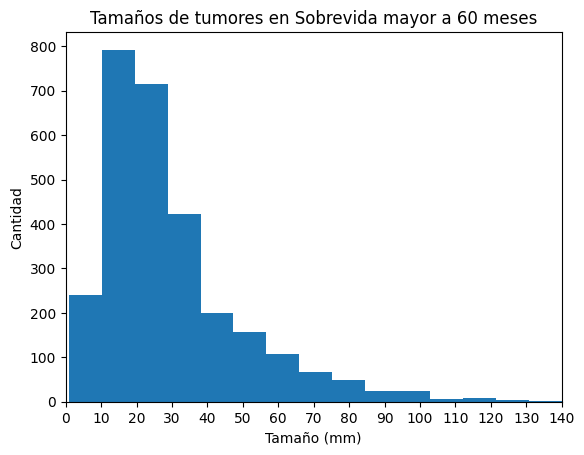

In [ ]:
# Histograma tamaños tumorales mas60meses

size = np.array(mas60meses['Tumor Size'])
fig, ax = plt.subplots()
ax.hist(size, bins=15) # default daba 10 bins
ax.set_title('Tamaños de tumores en Sobrevida mayor a 60 meses')
ax.set_xlim([0,140])
ax.set_xticks(range(0, 141, 10))
ax.set_xlabel('Tamaño (mm)')
#ax.set_yticks(range(0, 1200, 100))
ax.set_ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

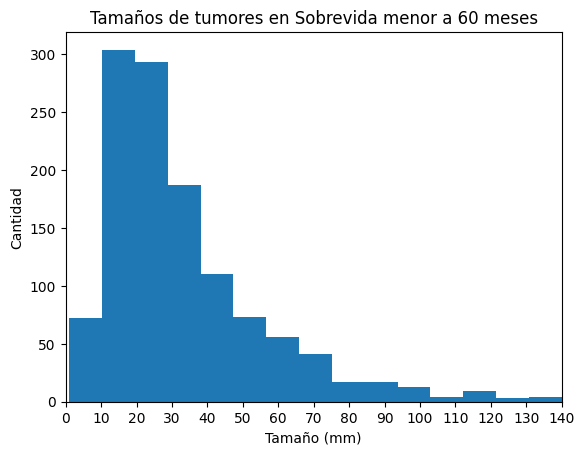

In [ ]:
#Histograma tamaños tumorales menos60meses

size = np.array(menos60meses['Tumor Size'])
fig, ax = plt.subplots()
ax.hist(size, bins=15) # default daba 10 bins
ax.set_title('Tamaños de tumores en Sobrevida menor a 60 meses')
ax.set_xlim([0,140])
ax.set_xticks(range(0, 141, 10))
ax.set_xlabel('Tamaño (mm)')
#ax.set_yticks(range(0, 1200, 100))
ax.set_ylabel('Cantidad')

Text(0, 0.5, 'Tamaño (mm)')

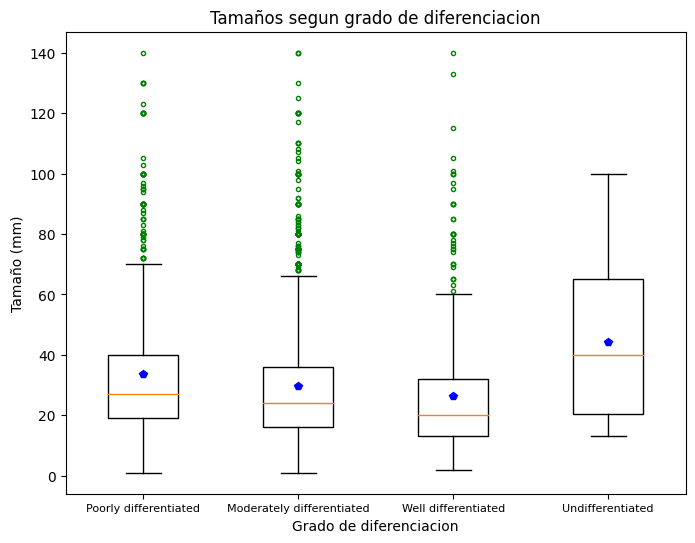

In [ ]:
# BOXPLOT de tamaño segun grado de diferenciacion

grouped_data = [df[df['Differentiate'] == categoria]['Tumor Size']
                for categoria in df['Differentiate'].unique()]

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(grouped_data, labels=df['Differentiate'].unique(),
           patch_artist=True,
           showmeans=True, #triangulito verde la media muestral de cada categoria
           meanprops = dict(marker='p', markeredgecolor='blue',markerfacecolor='blue'), #D es diamante, otros https://matplotlib.org/3.1.0/api/markers_api.html , p pentagonito,
           flierprops=dict(marker='o',
                           #markerfacecolor='lightpink', #igual que el fondo de lienzo
                           markersize=3,
                           linestyle='',
                           markeredgecolor='g'),
           boxprops = dict(facecolor="white"))
ax.set_xticklabels(df['Differentiate'].unique(), fontsize=8, )
ax.set_title('Tamaños segun grado de diferenciacion')
ax.set_xlabel('Grado de diferenciacion')
ax.set_ylabel('Tamaño (mm)')
#ax.set_facecolor('lightpink') #fondo

# pareceria que los undifferentiated tienen tamaños mas grandes, seguidos por los Poorly differnetiated, luego los Moderately y ultimo y mas pequeños los Well differentiated.

# queda pendiente hacer este grafico pero con alguna forma para q me tome las variables categoricas ordenadas

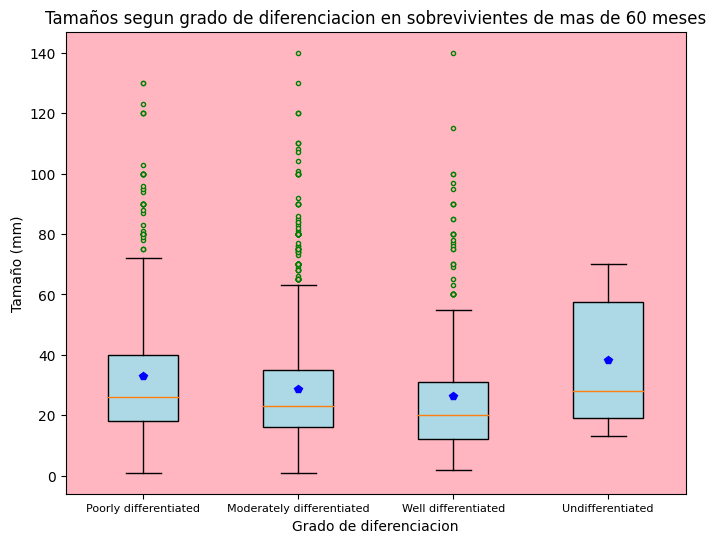

In [ ]:
# BOXPLOT de tamaño segun grado de diferenciacion mas60meses

grouped_data_mas60meses = [mas60meses[mas60meses['Differentiate'] == categoria]['Tumor Size']
                for categoria in df['Differentiate'].unique()]
colores = ['g','r','b','k']

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(grouped_data_mas60meses, labels=df['Differentiate'].unique(),
           patch_artist=True,
           showmeans=True, #triangulito verde la media muestral de cada categoria
           meanprops = dict(marker='p', markeredgecolor='blue',markerfacecolor='blue'), #D es diamante, otros https://matplotlib.org/3.1.0/api/markers_api.html , p pentagonito,
           flierprops=dict(marker='o',
                           markerfacecolor='lightpink', #igual que el fondo de lienzo
                           markersize=3,
                           linestyle='',
                           markeredgecolor='g'),
           boxprops = dict(facecolor="lightblue"))
ax.set_xticklabels(df['Differentiate'].unique(), fontsize=8, )
ax.set_title('Tamaños segun grado de diferenciacion en sobrevivientes de mas de 60 meses')
ax.set_xlabel('Grado de diferenciacion')
ax.set_ylabel('Tamaño (mm)')
ax.set_facecolor('lightpink') #fondo




Text(0, 0.5, 'Tamaño (mm)')

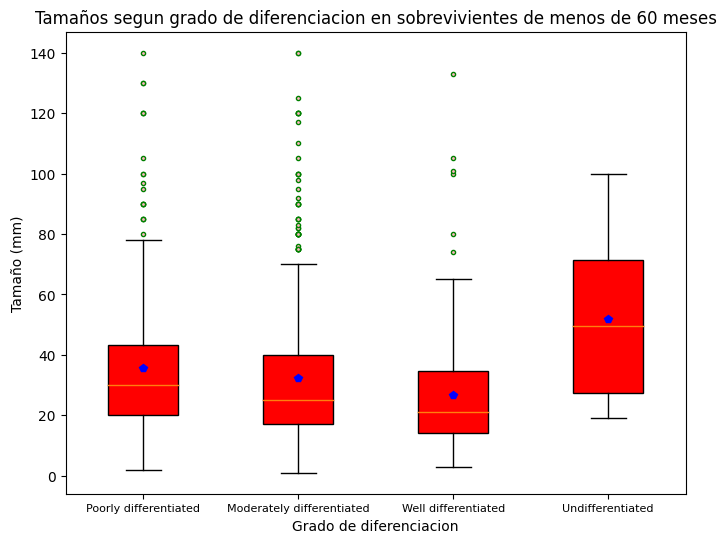

In [ ]:
# BOXPLOT de tamaño segun grado de diferenciacion menos60meses

grouped_data_menos60meses = [menos60meses[menos60meses['Differentiate'] == categoria]['Tumor Size']
                for categoria in df['Differentiate'].unique()]
colores = ['g','r','b','k']

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(grouped_data_menos60meses, labels=df['Differentiate'].unique(),
           patch_artist=True,
           showmeans=True, #triangulito verde la media muestral de cada categoria
           meanprops = dict(marker='p', markeredgecolor='blue',markerfacecolor='blue'), #D es diamante, otros https://matplotlib.org/3.1.0/api/markers_api.html , p pentagonito,
           flierprops=dict(marker='o',
                           markerfacecolor='lightpink', #igual que el fondo de lienzo
                           markersize=3,
                           linestyle='',
                           markeredgecolor='g'),
           boxprops = dict(facecolor="red"))
ax.set_xticklabels(df['Differentiate'].unique(), fontsize=8, )
ax.set_title('Tamaños segun grado de diferenciacion en sobrevivientes de menos de 60 meses')
ax.set_xlabel('Grado de diferenciacion')
ax.set_ylabel('Tamaño (mm)')
#ax.set_facecolor('lightpink') #fondo


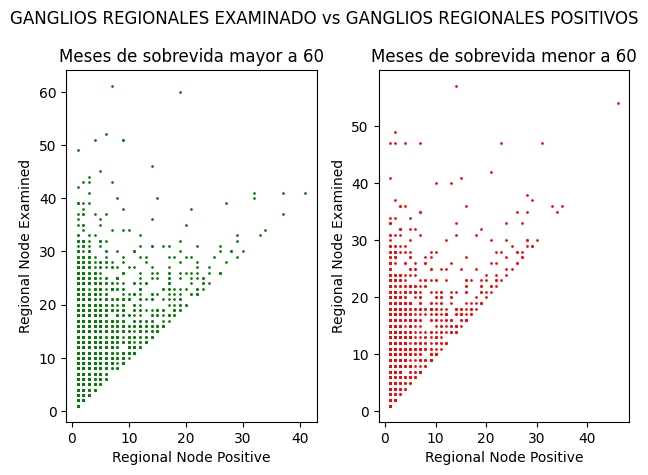

In [ ]:
# SCATTERPLOT DE CANTIDAD DE GANGLIOS REGIONALES EXAMINADO Y GANGLIOS REGIONALES POSITIVOS, SEPARADO POR SI VIVIO MAS O MENOS DE 60 MESES

# sobrevida MAYOR 60 meses
x = np.array(mas60meses["Regional Node Positive"])
y = np.array(mas60meses["Regional Node Examined"])
plt.subplot(1, 2, 1) #1 row, 2 columns, and this plot is the first plot.
plt.scatter(x, y, color = 'g', s=0.9, alpha=1)
plt.title("Meses de sobrevida mayor a 60")
plt.xlabel("Regional Node Positive")
plt.ylabel("Regional Node Examined")

# sobrevida MENOR 60 meses
x = np.array(menos60meses["Regional Node Positive"])
y = np.array(menos60meses["Regional Node Examined"])
plt.subplot(1, 2, 2)
plt.scatter(x, y, color = 'r', s=0.9, alpha=1)
plt.title("Meses de sobrevida menor a 60")
plt.xlabel("Regional Node Positive")
plt.ylabel("Regional Node Examined")

plt.suptitle("GANGLIOS REGIONALES EXAMINADO vs GANGLIOS REGIONALES POSITIVOS")
plt.tight_layout()
plt.show()

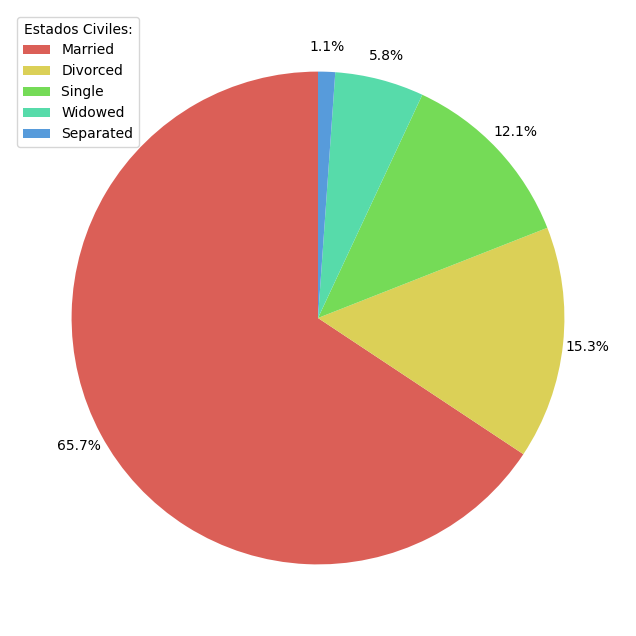

In [ ]:
# PIE CHART estados civiles

serie_estatus = df["Marital Status"].value_counts()
serie_estatus
categorias = df["Marital Status"].unique()

fig,ax = plt.subplots(figsize =(8,8))
fig.set_facecolor('w')
ax.pie(serie_estatus, radius=1, startangle=90, explode=[0,0,0,0,0], autopct= "%1.1f%%", pctdistance = 1.1, colors=sns.color_palette("hls",7))
plt.legend(categorias, loc="upper left", fontsize=10, title= "Estados Civiles:")
plt.show()


# Simple grafico de tortas, se ve la mayoria de los sujetos esta casado.


# SEABORN

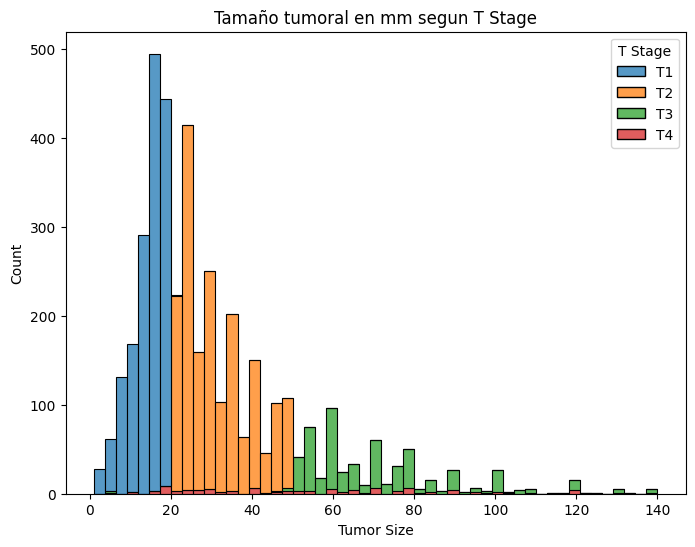

In [ ]:
# HISTPLOT: histograma de tamaño tumorales segun T Stage

plt.figure(figsize=(8, 6))
sns.histplot(df, x="Tumor Size",
             hue="T Stage",
             multiple="stack",
             palette="tab10").set_title("Tamaño tumoral en mm segun T Stage")
# multiple: stack: apilado, layer: default transparencia,  dodge: pone las columnas separads, fill: del 100% llena la columna

plt.show()

<Figure size 500x800 with 0 Axes>

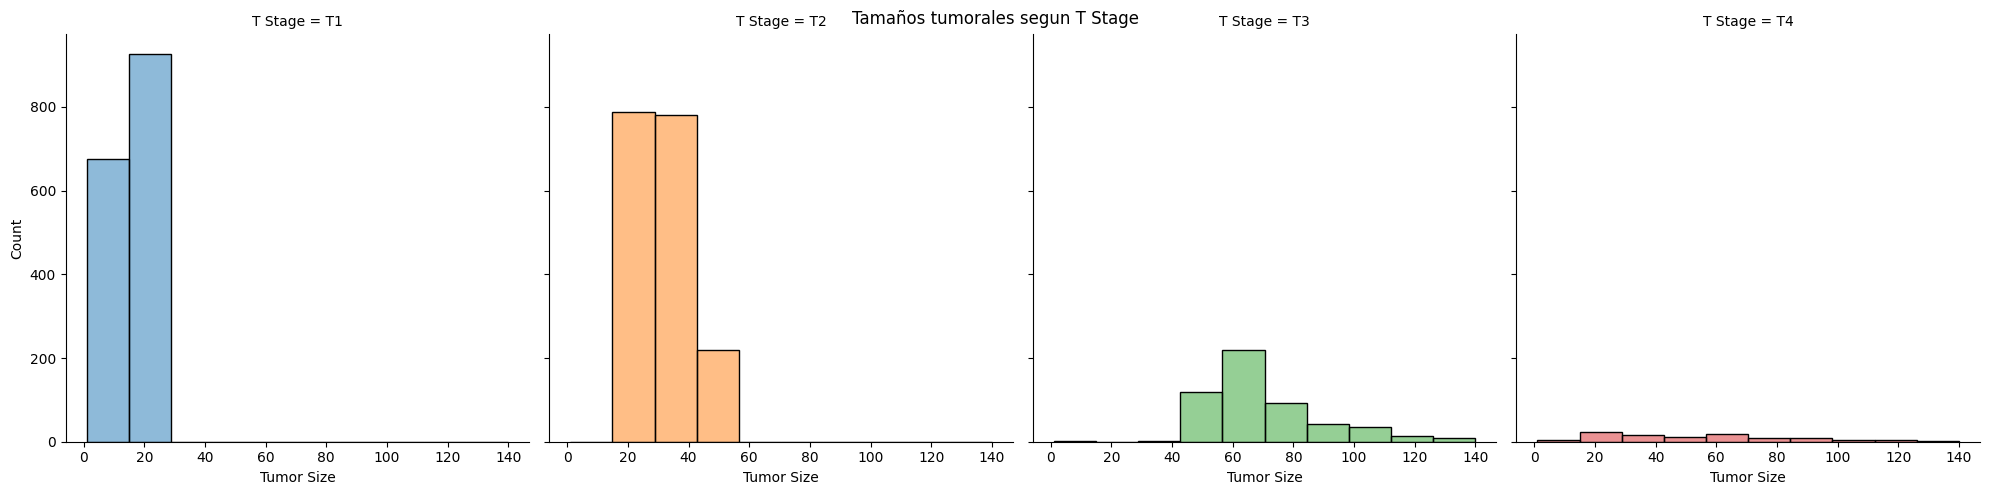

In [ ]:
# DISPLOT: histograma de tamaño tumorales segun T Stage con Displot

plt.figure(figsize=(5, 8))
grafico = sns.displot(df, x="Tumor Size", kind="hist", bins= 10, hue="T Stage", col="T Stage", palette="tab10", legend=None)
# multiple: stack: apilado, layer: default transparencia,  dodge: pone las columnas separads, fill: del 100% llena la columna
grafico.fig.suptitle('Tamaños tumorales segun T Stage')
plt.show()

<Figure size 600x800 with 0 Axes>

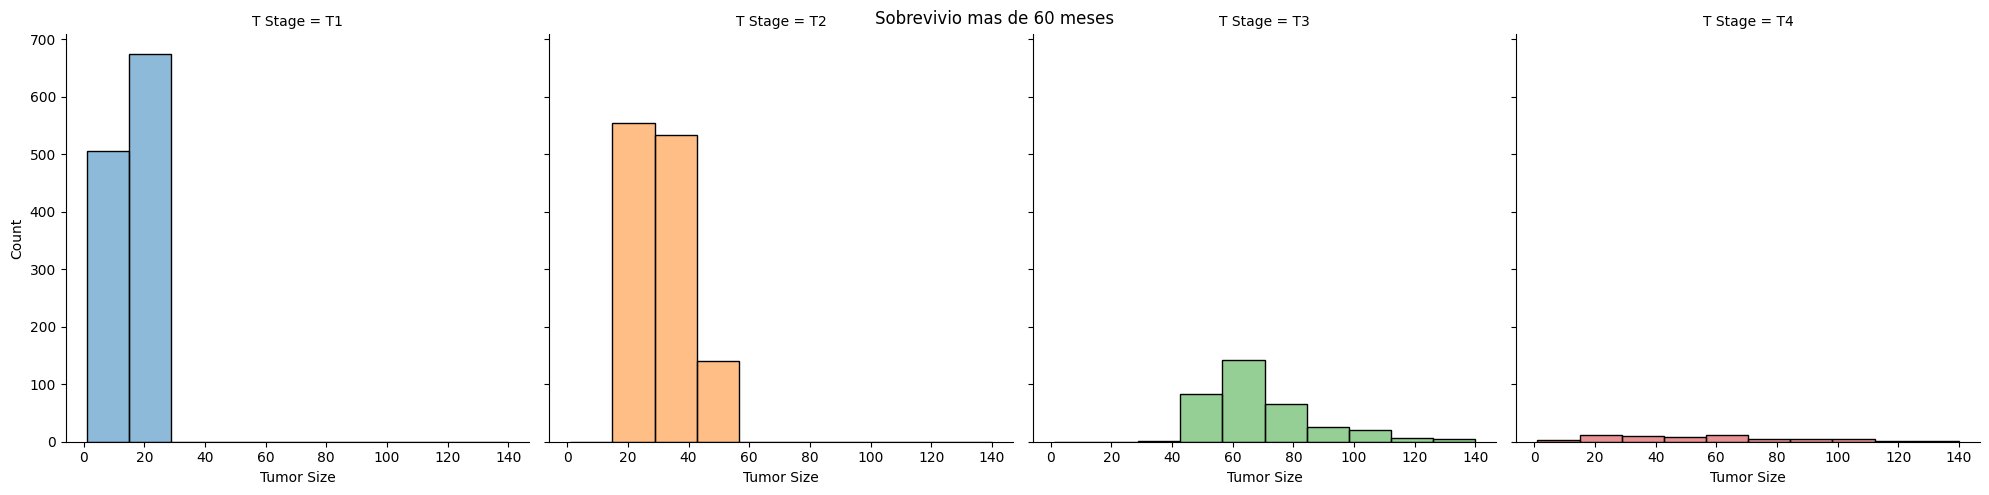

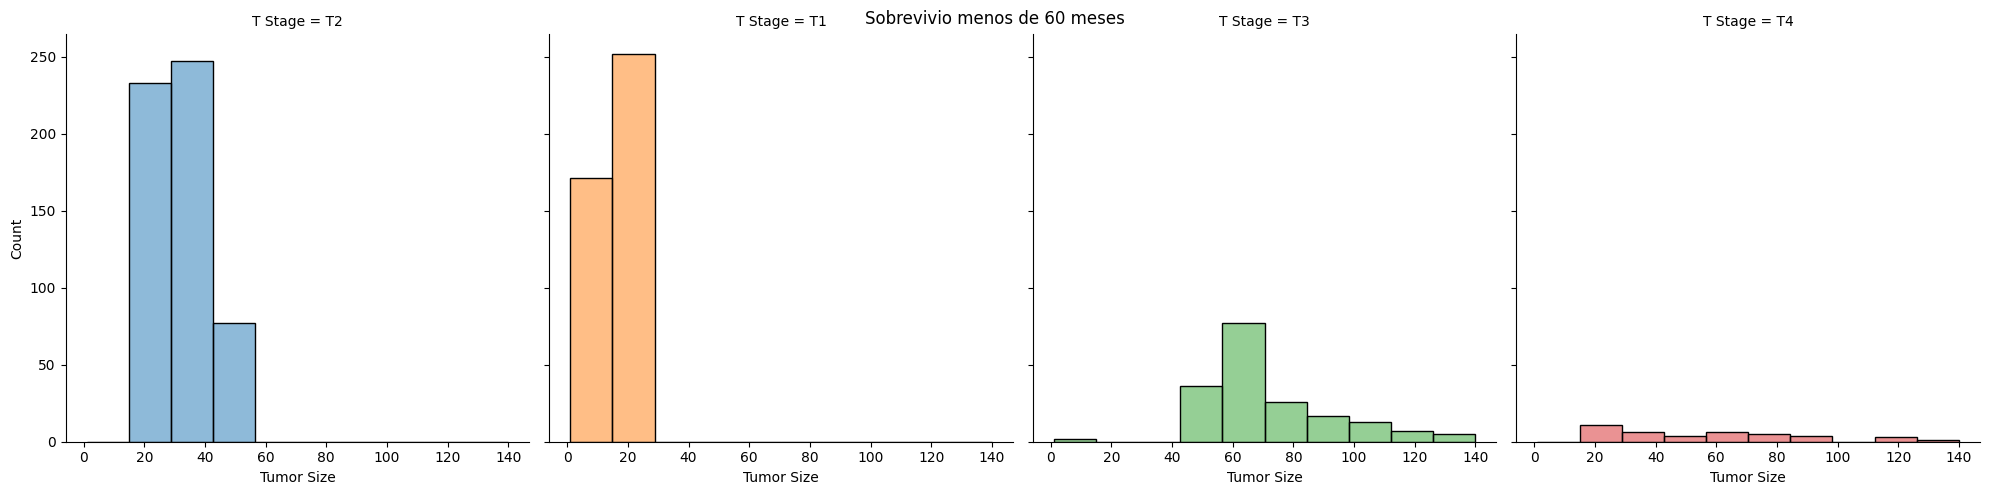

In [ ]:
# DISPLOT: histograma de tamaño tumorales segun T Stage con Displot PARA SUPERVIVIENTES DE MAS O MENOS DE 5 AÑOS

plt.figure(figsize=(6, 8))

grafico1 = sns.displot(mas60meses, x="Tumor Size", kind="hist", bins= 10, hue="T Stage", col="T Stage", palette="tab10", legend=None)
plt.suptitle('Sobrevivio mas de 60 meses')

grafico2 = sns.displot(menos60meses, x="Tumor Size", kind="hist", bins= 10, hue="T Stage", col="T Stage", palette="tab10", legend=None)
plt.suptitle('Sobrevivio menos de 60 meses')

plt.show()

#veo que en el segundo set, me los ordeno mal, puso T2 luego T1
# ademas usa otro eje y con lo cual es mas dificil de comparar

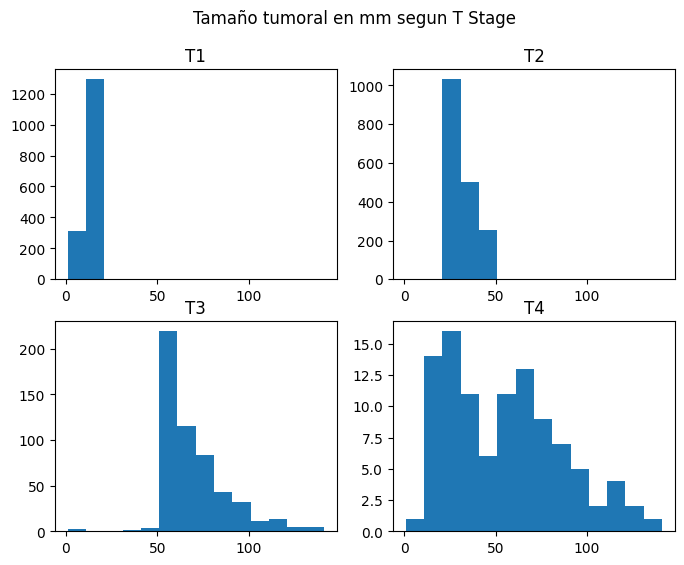

In [ ]:
# Histogramas subplots COLS TAMAÑOS TUMORALES SEGUN T STAGE
bin_width = 10
bin_range = range(1, 150, bin_width)
fig, axs = plt.subplots (nrows=2, ncols=2, figsize=(8, 6)) # si comparten ejes queda muy chiquito el T4 porque son pocos casos

axs[0,0].hist(df[df["T Stage"]=="T1"]["Tumor Size"], bins=bin_range)
axs[0,0].set_title("T1")

axs[0,1].hist(df[df["T Stage"]=="T2"]["Tumor Size"], bins=bin_range)
axs[0,1].set_title("T2")

axs[1,0].hist(df[df["T Stage"]=="T3"]["Tumor Size"], bins=bin_range)
axs[1,0].set_title("T3")

axs[1,1].hist(df[df["T Stage"]=="T4"]["Tumor Size"], bins=bin_range)
axs[1,1].set_title("T4")

fig.suptitle("Tamaño tumoral en mm segun T Stage")
plt.show()

# no comparten eje y porque las cantidades de cada uno son muy distintas
# en este subplot se ve como cada categoria tiene sus tamaños de inicio, T1 hasta 20mm (2cm), T2 entre 20 y 50 mm, T3 mas de 50mm y T4 cualquier tamaño, pero infiltra otros tejidos

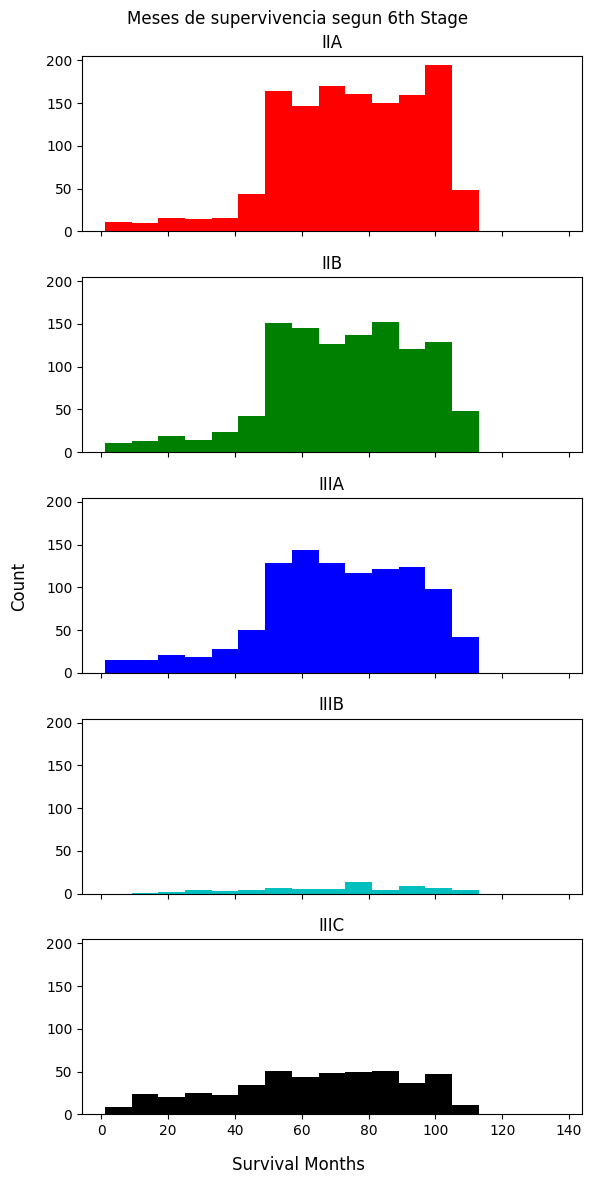

In [ ]:
# SUBPLOTS HISTOGRAMAS de Survival Months segun 6th Stage
bin_width = 8
bin_range = range(1, 140, bin_width)
fig, axs = plt.subplots (nrows=5, figsize=(6, 12), sharex=True, sharey=True )

axs[0].hist(df[df["6th Stage"]=="IIA"]["Survival Months"], color="r", bins=bin_range)
axs[0].set_title("IIA")

axs[1].hist(df[df["6th Stage"]=="IIB"]["Survival Months"], color="g", bins=bin_range)
axs[1].set_title("IIB")

axs[2].hist(df[df["6th Stage"]=="IIIA"]["Survival Months"], color="b", bins=bin_range)
axs[2].set_title("IIIA")

axs[3].hist(df[df["6th Stage"]=="IIIB"]["Survival Months"], color="c", bins=bin_range)
axs[3].set_title("IIIB")

axs[4].hist(df[df["6th Stage"]=="IIIC"]["Survival Months"], color="k", bins=bin_range)
axs[4].set_title("IIIC")

fig.suptitle("Meses de supervivencia segun 6th Stage")
fig.supxlabel("Survival Months")
fig.supylabel("Count")
fig.tight_layout()

plt.show()


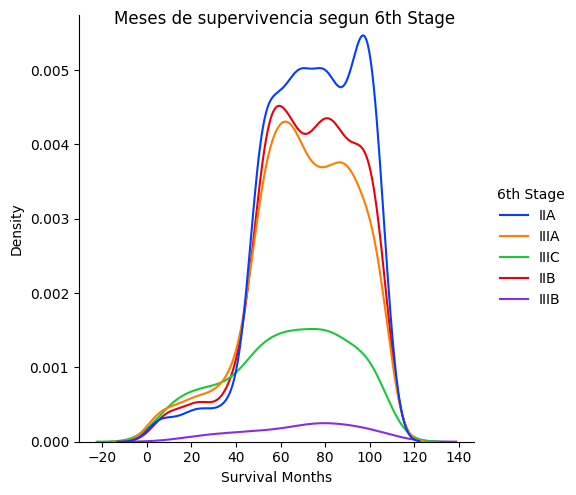

In [ ]:
# DISPLOT KDE curva de densidad , Meses de supervivencia segunn 6th Stage

figura2 = sns.displot(data=df, kind="kde", x="Survival Months",  hue="6th Stage", palette="bright")
figura2.fig.suptitle("Meses de supervivencia segun 6th Stage")

plt.show()

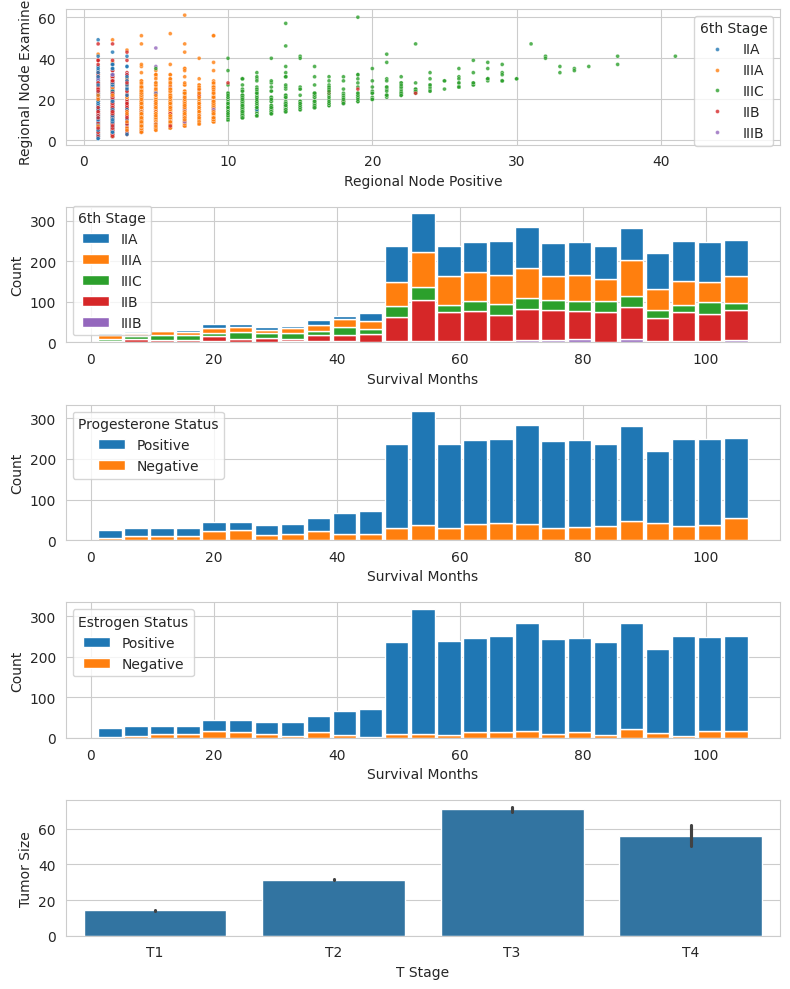

'\nInsights de cada agrafico:\n1) scatter plot RNP vs RNE:\n  - se ve registrados nodulos solo desde el estadio IIA, y la positividad y la cantidad de nodulos aumenta hacia peor estadio (IIIC)\n  - Predominio de mas de 10 ganglios positivos en IIIC\n  - Predominio de enre 4 y 9 ganglios posotiovo en IIIA\n2) Barras de meses de supervivencia, visualizando su composicion segun 6th Stage:\n  - parece un abrupto aumento de la supervivencia de mas de 44 meses para todos los estadios, manteniendose una composicion homogena de estadios para todos los lapsos de tiempo\n3y4) Barras de meses de supervivencia categorizado segun Progesteron o Estrogen Status:\n  - para ambos indicadores, se ve que aumenta la proporcion de positivos que sobreviven mas meses. \n  Aqui quedaria para indagar el fenotipo triple negativo, pero la base carece del dato de receptores HER. \n  Tener marcadores hormonales propensos tratamiento quizas sea la razon de que prevalezca la positidad en meses de supervivencia mayor

In [ ]:
# Tira de graficos
f, axs = plt.subplots(5,1, figsize=(8,10))

sns.scatterplot(data=df, x="Regional Node Positive", y="Regional Node Examined", hue="6th Stage", alpha=0.8, ax=axs[0], s=8)
sns.histplot(data=df, x="Survival Months", hue="6th Stage", multiple="stack", shrink=.9, alpha=1, legend=True, ax=axs[1])
sns.histplot(data=df, x="Survival Months", hue="Progesterone Status", multiple="stack", shrink=.9, alpha=1, legend=True, ax=axs[2])
sns.histplot(data=df, x="Survival Months", hue="Estrogen Status", multiple="stack", shrink=.9, alpha=1, legend=True, ax=axs[3])
sns.barplot(data=df, x="T Stage", y="Tumor Size", ax=axs[4])
f.tight_layout()
plt.show()

"""
Insights de cada agrafico:
1) scatter plot RNP vs RNE:
  - se ve registrados nodulos solo desde el estadio IIA, y la positividad y la cantidad de nodulos aumenta hacia peor estadio (IIIC)
  - Predominio de mas de 10 ganglios positivos en IIIC
  - Predominio de enre 4 y 9 ganglios posotiovo en IIIA
2) Barras de meses de supervivencia, visualizando su composicion segun 6th Stage:
  - parece un abrupto aumento de la supervivencia de mas de 44 meses para todos los estadios, manteniendose una composicion homogena de estadios para todos los lapsos de tiempo
3y4) Barras de meses de supervivencia categorizado segun Progesteron o Estrogen Status:
  - para ambos indicadores, se ve que aumenta la proporcion de positivos que sobreviven mas meses.
  Aqui quedaria para indagar el fenotipo triple negativo, pero la base carece del dato de receptores HER.
  Tener marcadores hormonales propensos tratamiento quizas sea la razon de que prevalezca la positidad en meses de supervivencia mayores.
  O se tomo una muestra de pacientes heterogenea desdede los que vivieron mas de 44 meses, donde auenta la cantidad que sobrevivieron
5) Tamaño tumoral segun T Stage:
  - como la clasificacion misma menciona, el tamaño es increcendo desde T1 a T3, para luego en T4 tener cualquier tamaño (representado por la linea del desvio estandard mas amplia) pro con otras caracteristicas adicionales
"""

# RELPLOT

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:728: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:728: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


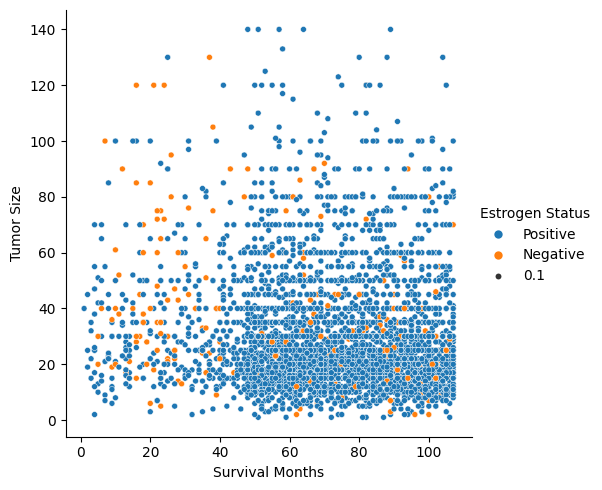

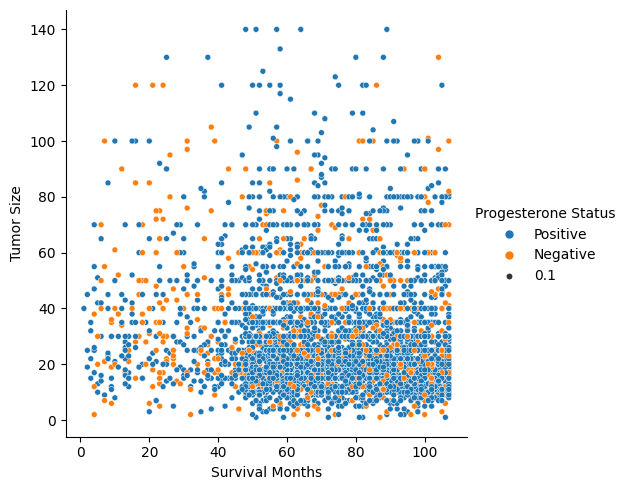

In [ ]:
# Scatter replots de tamaño tumoral y meses de sobrevivencia

sns.relplot(data=df, x="Survival Months", y="Tumor Size", hue="Estrogen Status", kind="scatter", size=0.1, ax=axs[0])
sns.relplot(data=df, x="Survival Months", y="Tumor Size", size=0.1, hue="Progesterone Status", kind="scatter", ax=axs[1])

# quisiera que no aparezca el la leyenda el tamaño del punto 0.1


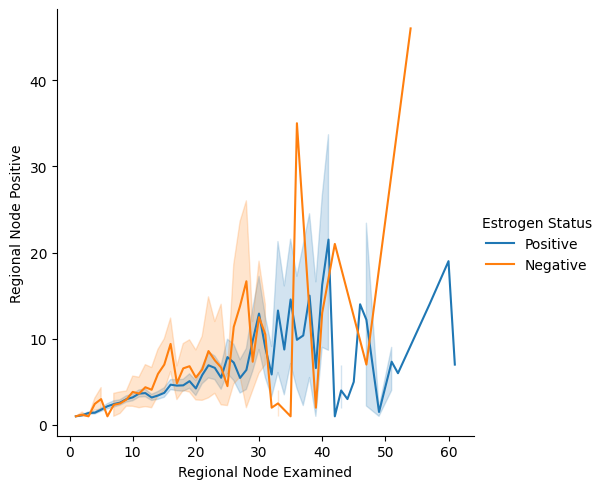

In [ ]:
# Line replots de Regional Node Examined y Regional Node Positive

sns.relplot(data=df, x="Regional Node Examined", y="Regional Node Positive", hue="Estrogen Status", kind="line")

# pareceriiiia verse una tendencia a positivo positivo

<Axes: xlabel='Progesterone Status', ylabel='Survival Months'>

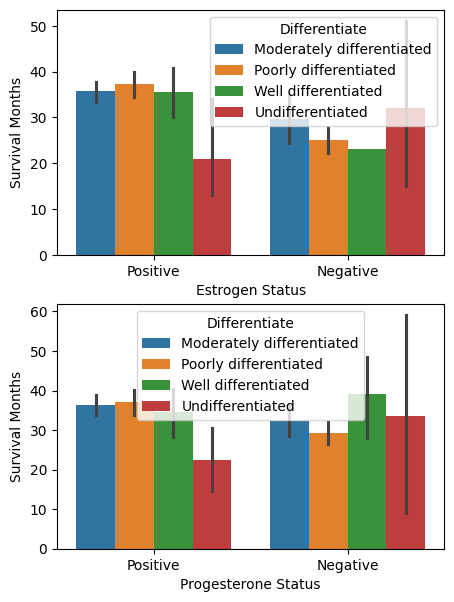

In [ ]:
# En Sobrevida MENOR a 60 meses: Meses de sobrevivencia segun marcador hormmonal (Estrogeno o Progesterona) positivo o negativo y Grado de diferenciacion tumoral

f, axs = plt.subplots(2,1, figsize=(5,7))

sns.barplot(y='Survival Months',x='Estrogen Status', hue='Differentiate', data=menos60meses[menos60meses["Status"]=="Dead"], ax=axs[0])
sns.barplot(y='Survival Months',x='Progesterone Status', hue='Differentiate', data=menos60meses[menos60meses["Status"]=="Dead"], ax=axs[1])

# seria mejor cuando me ordene las categorias cualitativas, pero a grandisimos resgos, para ambos marcadores tumorales, si es positivo y undifferentiatedd tiene menor sobrevida en meses

<Axes: xlabel='Progesterone Status', ylabel='Survival Months'>

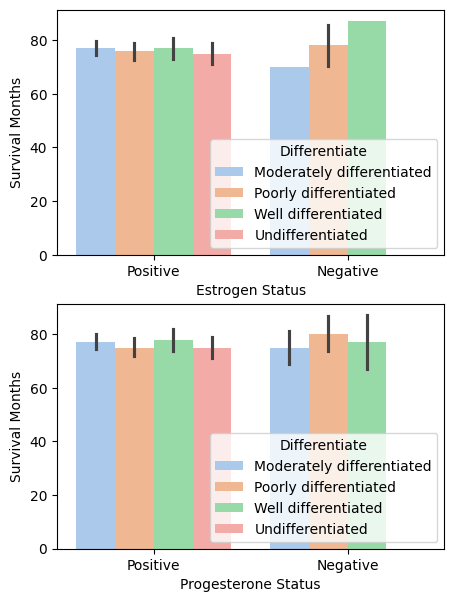

In [ ]:
# En sobrevida MAYOR a 60 meses,
# segun marcador hormonal y estado de diferenciacion, cuantos meses sobrevivieron
# no hay registros de sobrevivientes de mas de 60 meses con marcadores hormonales negativos e indiferenciados

f, axs = plt.subplots(2,1, figsize=(5,7))

sns.barplot(y='Survival Months',x='Estrogen Status', hue='Differentiate', data=mas60meses[mas60meses["Status"]=="Dead"], palette="pastel", ax=axs[0])
sns.barplot(y='Survival Months',x='Progesterone Status', hue='Differentiate', data=mas60meses[mas60meses["Status"]=="Dead"],  palette="pastel", ax=axs[1])

Diagrama de dispersion con SNS

Text(0, 0.5, 'Nodulos Regionales Positivos')

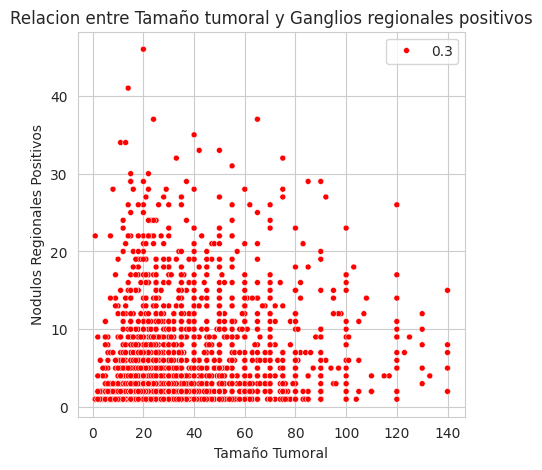

In [ ]:
# Scatterplot con sns de Nodulos regionales positivos y tamaño tumoral

sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.scatterplot(x=df["Tumor Size"], y=df["Regional Node Positive"], marker='o', color="r", size=0.3)
plt.title('Relacion entre Tamaño tumoral y Ganglios regionales positivos')
plt.xlabel('Tamaño Tumoral')
plt.ylabel('Nodulos Regionales Positivos')

In [ ]:
# valores de correlacion con Numpy : ninguno parece correlacionar mucho...

#np.corrcoef(df["Tumor Size"], df["Regional Node Positive"]) #0.24
#np.corrcoef(df["Regional Node Examined"], df["Regional Node Positive"]) #0.41
#np.corrcoef(df["Tumor Size"], df["Survival Months"]) # -0.08
#np.corrcoef(df["Age"], df["Survival Months"]) #-0,009
#np.corrcoef(df["Tumor Size"], df["Age"]) #-0,07
#np.corrcoef(df["Regional Node Examined"], df["Tumor Size"]) #0.1


array([[1.       , 0.1043518],
       [0.1043518, 1.       ]])

Text(0.5, 1.0, 'Regional Node Examined vs Positive')

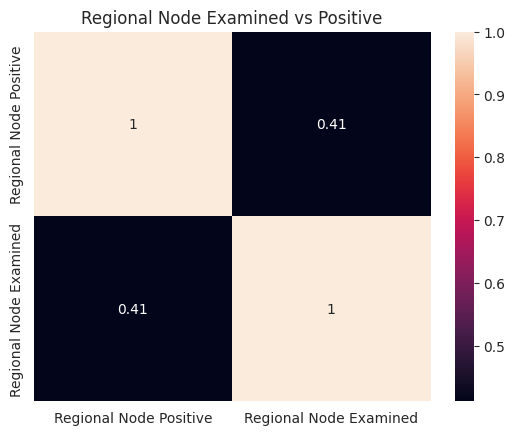

In [ ]:
# Graficos HEATMAP de correlacion con SNS

#Correlacion Regional Nodes Examined vs Positive
columnas_seleccionadas = df[["Regional Node Positive", "Regional Node Examined"]]

# Calcular la matriz de correlación
matriz_correlacion = columnas_seleccionadas.corr()

# Crear una visualización de la matriz de correlación utilizando seaborn
sns.heatmap(matriz_correlacion, cmap='rocket', annot=True).set_title("Regional Node Examined vs Positive")